Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


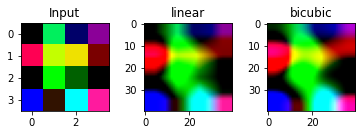

In [51]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
def interpolateN(x,scale_factor): #N维线性插值，递归调用，每次对最后一维进行插值并移到[2]队首处
    s=x.shape
    x=x.reshape(s[0],-1,s[-1])
    output = F.interpolate(x, scale_factor=scale_factor, mode='linear').reshape(tuple(s[:-1])+tuple([-1])) #mode='linear'nearest-exact
    output = output.unsqueeze(2).transpose(2, -1).squeeze(-1) #*[1, 3, 4, 4, 8]→[1, 3, 8, 4, 4]
    if output.shape[-1]==output.shape[2]: #*[1, 3, 8, 8, 8]
        return output
    else:
        return interpolateN(output,scale_factor)

# 创建一个随机张量作为输入
input = torch.randn(1, 3, 4, 4)

# 定义输出大小或缩放因子
scale_factor = 10

# 进行上采样
output = interpolateN(input,scale_factor)
output2=F.interpolate(input, scale_factor=scale_factor, mode='bicubic') #'area''bilinear'

# 创建一个 1x3 的子图，将输入和输出分别放在三个子图中
fig, axes = plt.subplots(1, 3)

# 在左边的子图中绘制输入张量
axes[0].imshow(input[0].permute(1, 2, 0).numpy())
axes[0].set_title('Input')
# 在中间的子图中绘制输出张量
axes[1].imshow(output[0].permute(1, 2, 0).numpy())
axes[1].set_title('linear')
# 在右边的子图中绘制输出张量
axes[2].imshow(output2[0].permute(1, 2, 0).numpy())
axes[2].set_title('bicubic')

# 调整子图之间的间距
fig.subplots_adjust(wspace=0.4)

# 显示图像
plt.show()